<div style="text-align: center;">
    <h1>Multiple Linear Regression</h1>
</div>

<img src="https://static.vecteezy.com/system/resources/previews/019/487/113/original/news-icons-set-newspapper-tv-radio-web-site-white-on-a-black-background-vector.jpg" width="400" height="200">


### There is a dataset regarding sales figures based on TV, radio, and newspaper advertisements. Using this data, the impact of a specific investment on sales figures is being analyzed through machine learning methods. Specifically, the aim is to determine how much sales figures increase with individual investments in TV, radio, and newspapers, and to identify which advertising method is more successful. This analysis will help us understand which advertising channel is more effective and how to allocate our future advertising budget most efficiently.

In [1]:
import pandas as pd
pd.set_option("display.max_columns",55)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('advertising.csv')

## EDA  (Exploratory Data Analysis)

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 4)

In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

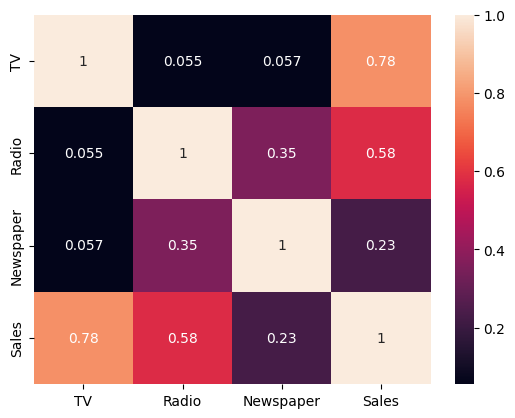

In [7]:
sns.heatmap(df.corr(),annot=True)

In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Modelling

In [10]:
x=df[['TV','Radio','Newspaper']]

In [11]:
y=df[['Sales']]

In [12]:
lr=LinearRegression()

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [14]:
model=lr.fit(x_train,y_train)

In [15]:
predict_lr=lr.predict(x_test)

In [16]:
mean_squared_error(y_test,predict_lr)**.5

1.78159966153345

In [17]:
r2_score(y_test,predict_lr)

0.899438024100912

## Performing inference by assigning values to the model

In [18]:
df1={'TV':[1],'Radio':[200],'Newspaper':[1]}
df1=pd.DataFrame(df1)
predict=lr.predict(df1)
predict

array([[40.86556882]])

In [19]:
df2={'TV':[1],'Radio':[1],'Newspaper':[200]}
df2=pd.DataFrame(df2)
predict2=lr.predict(df2)
predict2

array([[3.76521478]])

In [20]:
df3={'TV':[200],'Radio':[1],'Newspaper':[1]}
df3=pd.DataFrame(df3)
predict3=lr.predict(df3)
predict3

array([[12.116927]])

In [21]:
import numpy as np

In [22]:
y_test1=np.array(y_test)

In [23]:
print("y_test shape:", np.shape(y_test1))#Reduced to a single dimension.
print("predict_lr shape:", np.shape(predict_lr))

y_test shape: (40, 1)
predict_lr shape: (40, 1)


In [24]:
predict_lr = predict_lr.flatten()
y_test1 = y_test1.flatten()

In [25]:
results = pd.DataFrame({'Actual': y_test1, 'Predicted': predict_lr})

In [26]:
results

,Actual,Predicted
0,16.9,16.408024
1,22.4,20.889882
2,21.4,21.553843
3,7.3,10.608503
4,24.7,22.112373
5,12.6,13.105592
6,22.3,21.057192
7,8.4,7.461010
8,11.5,13.606346
9,14.9,15.155070


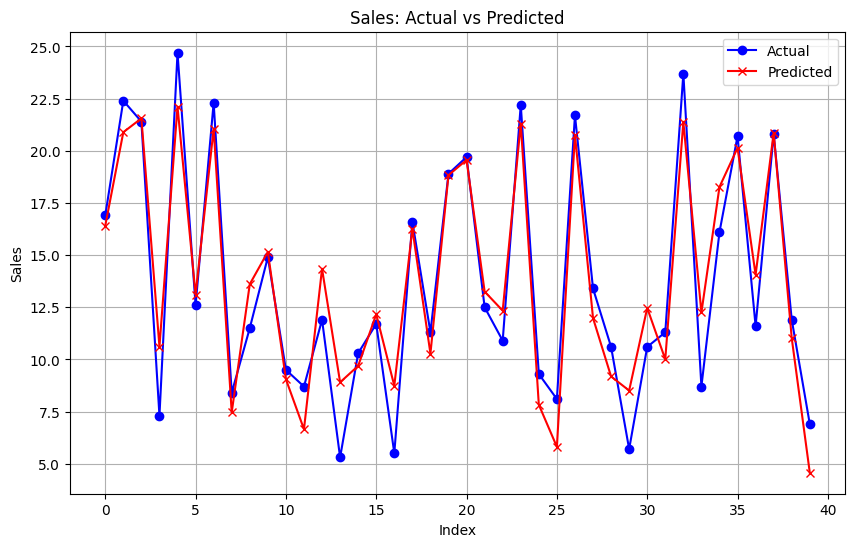

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(results.index, results['Actual'], label='Actual', color='b', marker='o')
plt.plot(results.index, results['Predicted'], label='Predicted', color='r', marker='x')
plt.title('Sales: Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

Performing inference by assigning values to the model, it has been analyzed that advertising on radio is more effective for sales compared to other media types. Here are the obtained results:

- Advertising in newspapers results in approximately \(3.77\) units of sales.
- Advertising on TV results in approximately \(12.12\) units of sales.
- Advertising on radio results in approximately \(40.87\) units of sales.

To evaluate how much more effective radio advertising is compared to the others, we can calculate the ratio of sales from radio advertising to sales from newspaper and TV advertising:

- **Radio vs. Newspaper**:
  $$
  \text{Ratio} = \frac{\text{Radio Sales}}{\text{Newspaper Sales}} = \frac{40.87}{3.77} \approx 10.85
  $$
  Radio advertising generates approximately \(10.85\) times more sales compared to newspaper advertising.

- **Radio vs. TV**:
  $$
  \text{Ratio} = \frac{\text{Radio Sales}}{\text{TV Sales}} = \frac{40.87}{12.12} \approx 3.38
  $$
  Radio advertising generates approximately \(3.38\) times more sales compared to TV advertising.

In summary, radio advertising is approximately \(10.85\) times more effective than newspaper advertising and about \(3.38\) times more effective than TV advertising in generating sales.
